# Random forest without the district #

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import platform

In [2]:
#Reading the pre_processed data
os_type = platform.system()
if os_type.startswith("Darwin"):
    data = pd.read_excel(r"dataset/processed_data/main/final_cleaned_dataset.xlsx")
else: 
    data = pd.read_excel(r"dataset\processed_data\main\final_cleaned_dataset.xlsx")
#Droping the target col
feature_value_temp = data.drop("Laboratory confirmed, since the beginning of the pandemic Hospitalized", axis=1)
#Droping the Distric col as it is string and will be assigned value by clustering
features = feature_value_temp.drop("District",axis=1)
target_col = data["Laboratory confirmed, since the beginning of the pandemic Hospitalized"]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(features, target_col, test_size=0.3, random_state=29)

In [4]:
mse_value = []
estimators_ = []
for estimator in range(50,150):
    RF_model = RandomForestRegressor(n_estimators = estimator ,random_state= 22)
    RF_model.fit(X_train,y_train)
    y_pred = RF_model.predict(X_test)
    estimators_.append(estimator)
    mse_value.append(mean_squared_error(y_test, y_pred))

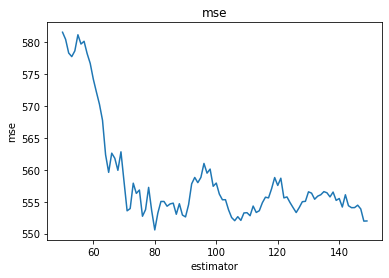

In [5]:
import matplotlib.pyplot as plt
plt.plot(estimators_, mse_value)
plt.title('mse')
plt.xlabel('estimator')
plt.ylabel('mse')
plt.show()

In [6]:
mse_value = []
estimators_ = []
for estimator in range(150,250):
    RF_model = RandomForestRegressor(n_estimators = estimator ,random_state= 22)
    RF_model.fit(X_train,y_train)
    y_pred = RF_model.predict(X_test)
    estimators_.append(estimator)
    mse_value.append(mean_squared_error(y_test, y_pred))


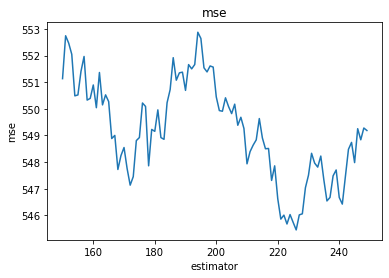

In [7]:
plt.plot(estimators_, mse_value)
plt.title('mse')
plt.xlabel('estimator')
plt.ylabel('mse')
plt.show()

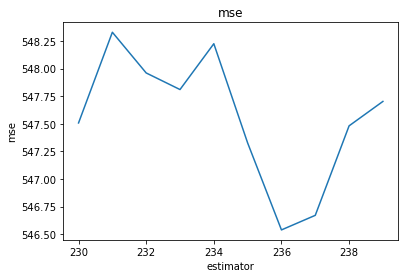

In [10]:
plt.plot(estimators_[80:90], mse_value[80:90])
plt.title('mse')
plt.xlabel('estimator')
plt.ylabel('mse')
plt.show()

In [14]:
from math import sqrt
RF_model = RandomForestRegressor(n_estimators = 236 ,random_state= 22)
RF_model.fit(X_train,y_train)
y_pred = RF_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Squared Error: {mse}")
print("R2 Score:", r2_score(y_test, y_pred))

Root Mean Squared Error: 23.37818172449867
Mean Squared Error: 546.5393807436836
R2 Score: 0.9957503364591642


In [13]:
#Predicted value
print(y_pred)
print(y_test)

[ 635.44491525  200.04661017  247.78813559 ...  677.80932203 1011.96186441
 1624.        ]
14201     609
6738      198
6835      246
4832      558
16575    1384
         ... 
7359      534
11424     927
12960     676
11699    1022
15180    1624
Name: Laboratory confirmed, since the beginning of the pandemic Hospitalized, Length: 5010, dtype: int64
